In [6]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd

In [7]:
df = pd.read_csv('Hotel_Unique_Complete.csv')

In [8]:
df = pd.read_csv('Hotel_Unique_Complete.csv')
df = df.fillna(0)
numeric_DF = df._get_numeric_data()
x = numeric_DF.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(x)
numeric_DF = pd.DataFrame(x_scaled,columns = numeric_DF.columns)

In [9]:
X,y = numeric_DF.iloc[:,:-1].values, numeric_DF["Overall_Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0,stratify=y)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.949823           0.949915
2          2.0            0.949823           0.949915
3          3.0            0.950195           0.949915
4          4.0            0.951685           0.948592
5          5.0            0.953454           0.948214
6          6.0            0.955595           0.946135
7          7.0            0.958388           0.943300
8          8.0            0.961180           0.941410
9          9.0            0.964532           0.939520
10        10.0            0.967045           0.934795
11        11.0            0.970210           0.929314
12        12.0            0.973096           0.931960
13        13.0            0.975982           0.924778
14        14.0            0.978961           0.927046
15        15.0            0.980357           0.922132
16        16.0            0.983057           0.922699
17        17.0            0.985478           0.922510
18        18.0            0.

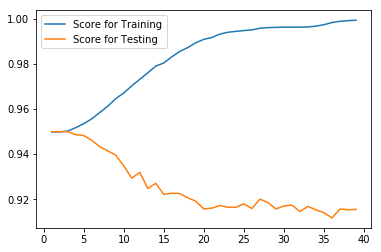

In [16]:
from sklearn.tree import DecisionTreeClassifier

resultsEntropy=pd.DataFrame(columns=['LevelLimit','Score for Training','Score for Testing'])
for treeDepth in range(1,40):
    dct=DecisionTreeClassifier(criterion='entropy', max_depth=treeDepth, random_state=0)
    dct=dct.fit(X_train, y_train)
    dct.predict(X_test)
    scoreTrain=dct.score(X_train, y_train)
    scoreTest=dct.score(X_test,y_test)
    resultsEntropy.loc[treeDepth]=[treeDepth,scoreTrain,scoreTest]
    
print(resultsEntropy.head(40))
resultsEntropy.pop('LevelLimit')
ax=resultsEntropy.plot()
print (ax)
    

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
dct=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=0)
dct=dct.fit(X_train,y_train)
dct_pred=dct.predict(X_test)
scoretest=dct.score(X_test,y_test)
scoretrain=dct.score(X_train, y_train)
print('\n','Mean Accuracy on Training Samples:',scoreTrain)
print('\n','Mean Accuracy on Testing Samples:',scoreTest)
print(classification_report(y_test,dct_pred))
print(confusion_matrix(y_test,dct_pred))


 Mean Accuracy on Training Samples: 0.9992552597281698

 Mean Accuracy on Testing Samples: 0.9155169155169155
             precision    recall  f1-score   support

        0.0       0.16      0.03      0.05       265
        1.0       0.95      0.99      0.97      5026

avg / total       0.91      0.94      0.92      5291

[[   8  257]
 [  43 4983]]


In [32]:
len(X_test)

5291

In [33]:
len(y_test)

5291

In [37]:
sum(y_test)

5026.0

In [38]:
sum(y_train)

10203.0

In [39]:
len(X_train)

10742